# pyTrad -- Tools for a trad musician 

This Project is using data from a community driven website for traditional Irish music.

https://thesession.org/

in which users can submit tunes in '.abc' format.

My goal is to make use of the rich source of information to augment a user's ability to find tunes they would like to play, and also as an academic study of the present-day distribution of tunes.

In the future work could be extended to other databases with focuses different than
Irish music.

The tasks for this code base are roughly divided by the type of information being used.

1. Information extracted directly from the '.abc' sheetmusic notation for the tunes in the DB.

2. Metadata associated with those tunes, or extracted from discussion text associated with the tunes. 

In this notbook I am focusing on (1), for details on (2) see 'web_scraper.ipynb'.

### Digitizing the tune from .abc

The sheet-music based tasks I am addressing with this codebase are achieved using a digitized version of the tune which stores the pitch information in arrays with integer values corresponding to the given semitone. The notes are discretized, so that each 

The intent is to be able to search for and compare tunes in cases where only portions of the tunes might be known, and the musical key for which the tune is stored in the database is not known.

This will be an approvement over previous reverse tune finders I have used as you will be able to specifically include measure structure avoiding false positives in cases that include a similar series of notes, but with a different measure structure.

The code for translating from the plain text '.abc' format to array based digitized form is in 'digitizedTune.py'

In addition to a 'digitizedTune' class, I also define and 'Interval' class, that behaves similarly, but looks at either differences between two different tune portions, or the location of the jumps and skips in a single piece of music.

For some basic '.abc' parsing tasks I make use of the pyabc library https://github.com/campagnola/pyabc, with minor modifications. 

### Creating a uniform tune structure

Musical notation can include many diverse features. Luckily, most trad tunes follow a fairly simple structures. Nonetheless some simplification must be taken to make different tunes directly comparable. I apply these simplifications on the '.abc' 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json

import pyabc
from digitizedTune import digitizedTune

from tune_structure import matchJsonField, inJsonField, fieldList, parseStructure


Here I look at two different tunes included in theSession database. These both happen to be 3 part jigs in Dmix.

In [2]:
# Tune #1

ts_tunes = json.loads(open('thesession_2017_07_12.json', 'rb').read().decode('utf8'))

t0 = matchJsonField(ts_tunes,'name','Banish Misfortune')[0]

t = parseStructure(t0)

dtune0 = digitizedTune(json=t)


Repeating part ended by a repeat with same ending.
Repeating part ended by a repeat with same ending.
Repeating part ended by a repeat with same ending.
fed cAG| A2d cAG| F2D DED| FEF GFG|AGA cAG| AGA cde|fed cAG| Ad^c d3|
fed cAG| A2d cAG| F2D DED| FEF GFG|AGA cAG| AGA cde|fed cAG| Ad^c d3||
f2d d^cd| f2g agf| e2c cBc|e2f gfe| f2g agf| e2f gfe|fed cAG|Ad^c d3|
f2d d^cd| f2g agf| e2c cBc|e2f gfe| f2g agf| e2f gfe|fed cAG|Ad^c d3||
f2g e2f| d2e c2d|ABA GAG| F2F GED|c3 cAG| AGA cde| fed cAG| Ad^c d3|
f2g e2f| d2e c2d|ABA GAG| F2F GED|c3 cAG| AGA cde| fed cAG| Ad^c d3||



In [3]:
# Tune #2

t1 = matchJsonField(ts_tunes,'name','Blarney Pilgrim, The')[0]

t = parseStructure(t1)

dtune1 = digitizedTune(json=t)

Repeating part ended by a repeat with same ending.
Repeating part ended by a repeat with same ending.
Repeating part ended by a repeat with same ending.
DED DEG| A2A ABc| BAG AGE| GEA GED|DED DEG|A2A ABc|BAG AGE| GED D3|
DED DEG| A2A ABc| BAG AGE| GEA GED|DED DEG|A2A ABc|BAG AGE| GED D3||
ded dBG|AGA BGE| ded dBG|AGA GAB|g2e dBG|AGA BGE|B2G AGE| GAG G3|
ded dBG|AGA BGE| ded dBG|AGA GAB|g2e dBG|AGA BGE|B2G AGE| GAG G3||
A2D B2D| A2D ABc|BAG AGE|GEA GED| ADD BDD|ADD ABc|BAG AGE|GED D3|
A2D B2D| A2D ABc|BAG AGE|GEA GED| ADD BDD|ADD ABc|BAG AGE|GED D3||



In [4]:
# Compare the first part of both tunes, and show the raw Interval values

t0p0 = dtune0.part(0)
t1p0 = dtune1.part(0)

p0compare = dtune0.diffPart(t0p0,t1p0)

print p0compare[0].values

type(p0compare[0])

[ 16.  16.  12.  12.  12.  12.  10.  10.   5.   5.   0.   0.]


digitizedTune.Interval

Here I select the first part of each tune and graphically show the parts of the tune that match.

16.6666666667 % Match


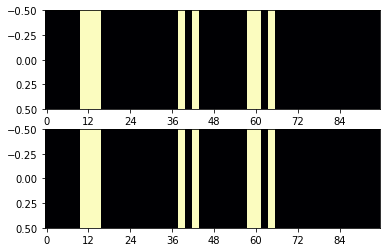

In [5]:
#Show exact match
# Show exact match or octave

# this could also be used to look for significant variations of tunes

arr = np.concatenate([p.unison().astype(float) * 1.0  for p in p0compare])
arr0 = np.array([arr[:len(arr)/2]])
arr1 = np.array([arr[len(arr)/2:]])
fig, axs = plt.subplots(2,1)

axs[0].imshow(arr0,aspect='auto',cmap=plt.get_cmap('magma'))
axs[1].imshow(arr1,aspect='auto',cmap=plt.get_cmap('magma'))
axs[0].xaxis.set_ticks(np.arange(0., 96., 16.*6./8.))
axs[1].xaxis.set_ticks(np.arange(0., 96., 16.*6./8.))

print sum(arr)/len(arr)*100.,'% Match'

plt.show()

Traditional tunes have a great deal of variation in melody. However these may include sections that are off by some standard interval, here I do the same comparison, but also show portions that have the same note in different octaves.

16.6666666667 % Unison
10.4166666667 % Octaves


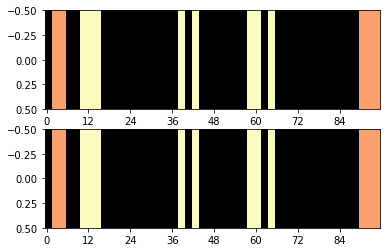

In [6]:
# Show exact match or octave

uni = np.concatenate([p.unison().astype(float) for p in p0compare])
octa = np.concatenate([p.octave().astype(float) for p in p0compare])
arr = 1.*uni + 0.8*octa 

arr0 = np.array([arr[:len(arr)/2]])
arr1 = np.array([arr[len(arr)/2:]])

fig, axs = plt.subplots(2,1)

axs[0].imshow(arr0,aspect='auto',cmap=plt.get_cmap('magma'))
axs[1].imshow(arr1,aspect='auto',cmap=plt.get_cmap('magma'))
axs[0].xaxis.set_ticks(np.arange(0., 96., 16.*6./8.))
axs[1].xaxis.set_ticks(np.arange(0., 96., 16.*6./8.))

print sum(uni)/len(uni)*100.,'% Unison'
print sum(octa)/len(octa)*100.,'% Octaves'

plt.show()

Here is the same procedure considering other common intervals (perfect fifth, major and minor thirds).

16.6666666667 % Unison
10.4166666667 % Octaves
12.5 % Perfect Fifths
4.16666666667 % Major Thirds
18.75 % Minor Thirds
47.9166666667 % Other


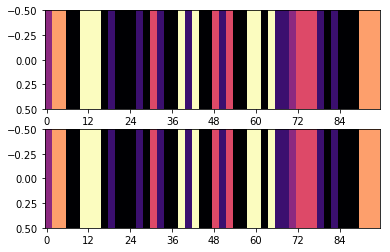

In [7]:
uni = np.concatenate([p.unison().astype(float) for p in p0compare])
octa = np.concatenate([p.octave().astype(float) for p in p0compare])
per5 = np.concatenate([p.perfect_fifth().astype(float) for p in p0compare])
maj3 = np.concatenate([p.major_third().astype(float) for p in p0compare])
min3 = np.concatenate([p.minor_third().astype(float) for p in p0compare])

arr = 1.*uni + 0.8*octa + 0.6 * per5 + 0.4 * maj3 + 0.2 * min3

arr0 = np.array([arr[:len(arr)/2]])
arr1 = np.array([arr[len(arr)/2:]])

fig, axs = plt.subplots(2,1)

axs[0].imshow(arr0,aspect='auto',cmap=plt.get_cmap('magma'))
axs[1].imshow(arr1,aspect='auto',cmap=plt.get_cmap('magma'))
axs[0].xaxis.set_ticks(np.arange(0., 96., 16.*6./8.))
axs[1].xaxis.set_ticks(np.arange(0., 96., 16.*6./8.))

print sum(uni)/len(uni)*100.,'% Unison'
print sum(octa)/len(octa)*100.,'% Octaves'
print sum(per5)/len(per5)*100.,'% Perfect Fifths'
print sum(maj3)/len(maj3)*100.,'% Major Thirds'
print sum(min3)/len(min3)*100.,'% Minor Thirds'
print 100.-sum(uni)/len(uni)*100.-sum(per5)/len(per5)*100.- sum(maj3)/len(maj3)*100.-sum(min3)/len(min3)*100.,'% Other'


plt.show()

Similar or identical tune can be played in different keys. Often times you may know a portion of the tune, but not know what the standard choice for key is.

With this digitized form it is very straighforward to consider  transpositions.

In [8]:
# Transpose tune so that 

print dtune0.key
print dtune0.interval_root()

tran = dtune0.transposeByInterval(dtune0.interval_root())
steps = dtune0.steps

part0 = np.concatenate([m for m in tran[0]])
part1 = np.concatenate([m for m in tran[1]])
part2 = np.concatenate([m for m in tran[2]])
flat = np.concatenate([part0,part1,part2])

steps0 = np.concatenate([m for m in steps[0]])
steps1 = np.concatenate([m for m in steps[1]])
steps2 = np.concatenate([m for m in steps[2]])

<Key D mixolydian>
-2


One future goal of this work is to create a tune recommend to do one of a possible different things.

- Recommend tunes that a musician might light based on a set of tunes they know/like.

- Recommend tunes that might fall into a style based on a set of recorded tunes.

- Suggest tunes that might be historically related.

- Suggest tunes that might fit together in a set.

To achieve this in ML framework we want a variety of features, both from the raw sheetmusic and from metadata for the tune. Below I look at some possible features for quantifying the shape of an individual tune.

In [9]:
# covariance of the three parts (note relative similarity of part 1 and 3)
np.cov(np.array([part0,part1,part2]) )

array([[ 16.9943281 ,   2.83158813,  12.58726003],
       [  2.83158813,  10.13438045,   1.54101222],
       [ 12.58726003,   1.54101222,  16.62652705]])

In [10]:
# Autocorrelation
np.correlate(part0, part1, mode='full')

array([   192.,    384.,    552.,    720.,    864.,   1008.,   1096.,
         1184.,   1272.,   1360.,   1344.,   1328.,   1314.,   1300.,
         1334.,   1368.,   1518.,   1668.,   1827.,   1986.,   2147.,
         2308.,   2441.,   2574.,   2648.,   2722.,   2793.,   2864.,
         2893.,   2922.,   2954.,   2986.,   3037.,   3088.,   3136.,
         3184.,   3294.,   3404.,   3519.,   3634.,   3798.,   3962.,
         4070.,   4178.,   4253.,   4328.,   4371.,   4414.,   4436.,
         4458.,   4497.,   4536.,   4646.,   4756.,   4887.,   5018.,
         5090.,   5162.,   5192.,   5222.,   5199.,   5176.,   5158.,
         5140.,   5146.,   5152.,   5221.,   5290.,   5497.,   5704.,
         5925.,   6146.,   6396.,   6646.,   6873.,   7100.,   7300.,
         7500.,   7588.,   7676.,   7742.,   7808.,   7873.,   7938.,
         7989.,   8040.,   8176.,   8312.,   8521.,   8730.,   8976.,
         9222.,   9537.,   9852.,  10147.,  10442.,  10577.,  10712.,
        10815.,  109

In [11]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

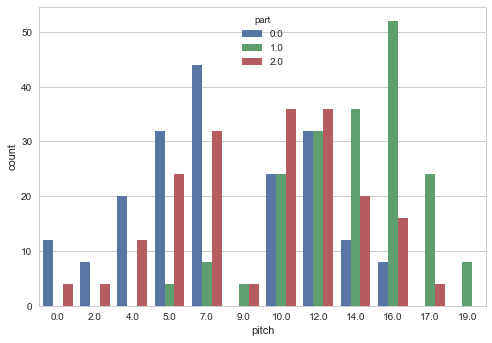

In [12]:
# Distribution of pitches in each part

pitch = np.concatenate([part0,part1,part2])
part = np.concatenate([np.ones(len(part0))*0,np.ones(len(part1))*1,np.ones(len(part2))*2])
intervals = np.concatenate([steps0,steps1,steps2])

df = pd.DataFrame(np.array([pitch,intervals,part]).transpose(),columns=['pitch','interval','part'])

sns.countplot(x='pitch',hue='part',data=df)
plt.show()

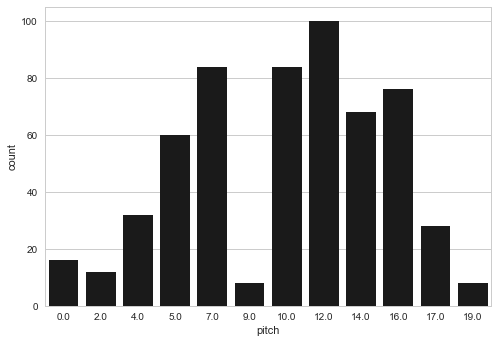

In [13]:
sns.countplot(x='pitch',color='k',data=df)
plt.show()

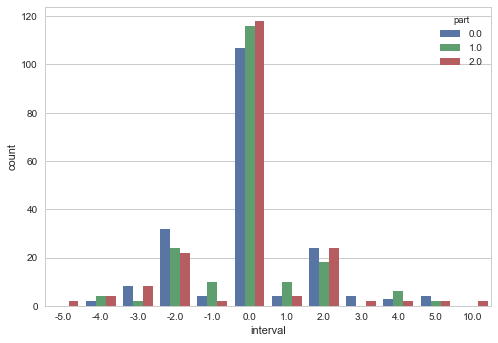

In [14]:
sns.countplot(x='interval',hue='part',data=df)
plt.show()

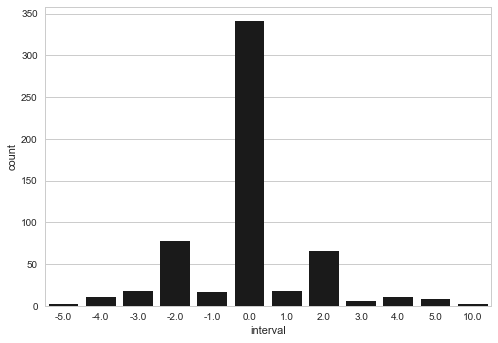

In [15]:
sns.countplot(x='interval',color='k',data=df)
plt.show()

/Users/swahl/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


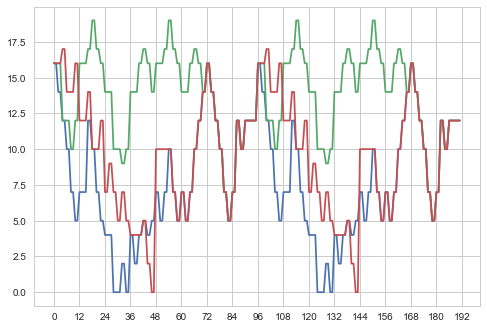

In [16]:
# plot the shape of each part

plt.plot(np.array([part0,part1,part2]).transpose(),)
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(0., len(part0)+1, 16.*6./8.))
plt.legend()
plt.show()

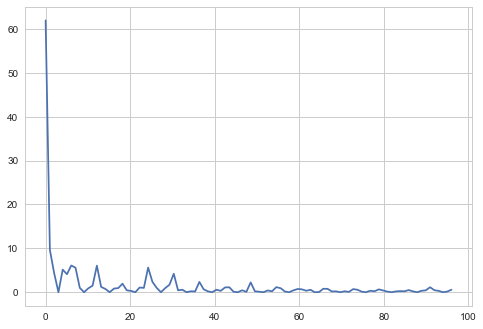

In [17]:
# Fourier Transform of pitch

from scipy.fftpack import fft

# Number of sample points
N = len(part0)
# sample spacing
T = 1./N
x = np.linspace(0.0, N*T, 3.*N)
y = pitch
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show()

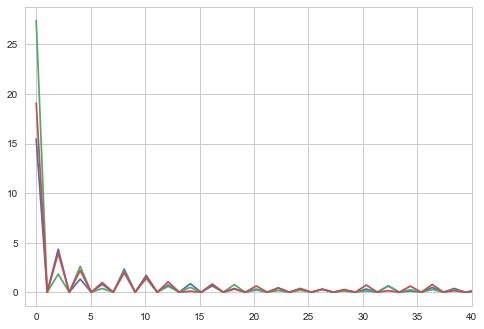

In [18]:
# Number of sample points
N = len(part0)
# sample spacing
T = 1./N
x = np.linspace(0.0, N*T, N)
y0 = part0
yf0 = fft(y0)
y1 = part1
yf1 = fft(y1)
y2 = part2
yf2 = fft(y2)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf0[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf2[0:N//2]))

plt.xlim([-1.,40.])

plt.show()

In [23]:
standard_time_signatures = {'jig':'6/8', 'reel':'4/4', 'slip jig':'9/8', 
                            'hornpipe':'4/4', 'polka':'2/4', 'slide':'12/8', 
                            'waltz':'3/4', 'barndance':'4/4', 'strathspey':'4/4', 
                            'three-two':'3/2', 'mazurka':'3/4'}


def tune_fragment(abc,meter='',mode='',ttype=''):
    '''
    Returns a digitizedTune object representing part of an unnamed tune.
    '''
    js = {}
    
    # generate meter from tune type
    if len(ttype) > 1:
        try:
            meter = standard_time_signatures[ttype]
        except:
            pass
    
    # important fields
    js.update({u'abc':abc,u'meter':meter,u'mode':mode,u'type':ttype})
    
    
    # empty fields (currently needed for digitized tune)
    js.update({u'date': u'',u'name': u'',u'setting': u'0',u'tune': u'0', u'username': u''})
    
    pjs = parseStructure(js)
    dt = digitizedTune(json=pjs)
    
    return dt


# to compare by parts we would need to expand this or compare to 

frag1 = tune_fragment('ADD BDD| ADD ABc|B2G A2E|',mode='Dmixolydian',ttype='jig')    

frag2 = tune_fragment('e2A F2A| e2A efg|fed z3|',meter='6/8',mode='Amixolydian')     

print frag1.num_parts
frag2.part(0)

Repeating part ended by reaching end of tune.
ADD BDD| ADD ABc|B2G A2E||

Repeating part ended by reaching end of tune.
e2A F2A| e2A efg|fed z3||

1


[array([ 16.,  16.,  16.,  16.,   9.,   9.,   6.,   6.,   6.,   6.,   9.,
          9.]),
 array([ 16.,  16.,  16.,  16.,   9.,   9.,  16.,  16.,  18.,  18.,  19.,
         19.]),
 array([ 18.,  18.,  16.,  16.,  14.,  14.,  nan,  nan,  nan,  nan,  nan,
         nan])]

In [25]:
dtune0.measure(2,2)


AttributeError: 'digitizedTune' object has no attribute 'numparts'

In [ ]:
z = frag2.pyabcTune.tokens[-4] 
print type(z)
z.length

In [ ]:
dtune0.num

In [ ]:
dtune0.diffMeasure?